# **SENTIMENTAL ANALYSIS OF TWITTER DATA**

**IMPORTING MODULES**

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
import nltk
import warnings
%matplotlib inline

warnings.filterwarnings('ignore')

**LOADING THE DATASET**

In [38]:
df = pd.read_csv('TSA.csv')
df.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


**PREPROCESSING THE DATASET**

In [40]:
df.isnull()

,id,label,tweet
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
31957,False,False,False
31958,False,False,False
31959,False,False,False
31960,False,False,False


In [41]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for word in r:
        input_txt = re.sub(word, "", input_txt)
    return input_txt

In [42]:
df.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [43]:
df['clean_tweet'] = np.vectorize(remove_pattern)(df['tweet'], "@[\w]*")

In [44]:
df.head()

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause th...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation,factsguide: society now #motivation


In [45]:
df['clean_tweet'] = df['clean_tweet'].str.replace("[^a-zA-Z#]", " ")
df.head()

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause th...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation,factsguide: society now #motivation


In [46]:
df.tail()

,id,label,tweet,clean_tweet
31957,31958,0,ate @user isz that youuu?ðððððð...,ate isz that youuu?ððððððð...
31958,31959,0,to see nina turner on the airwaves trying to...,to see nina turner on the airwaves trying to...
31959,31960,0,listening to sad songs on a monday morning otw...,listening to sad songs on a monday morning otw...
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,...","#sikh #temple vandalised in in #calgary, #wso..."
31961,31962,0,thank you @user for you follow,thank you for you follow


In [47]:
df['clean_tweet'] = df['clean_tweet'].apply(lambda x: " ".join([w for w in x.split() if len(w)>3]))
df.head()

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,when father dysfunctional selfish drags kids i...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks #lyft credit can't cause they don't off...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model love take with time urð±!!! ððð...
4,5,0,factsguide: society now #motivation,factsguide: society #motivation


**TOKENISATION**

In [48]:
tokenized_tweet = df['clean_tweet'].apply(lambda x: x.split())
tokenized_tweet.head()

0    [when, father, dysfunctional, selfish, drags, ...
1    [thanks, #lyft, credit, can't, cause, they, do...
2                              [bihday, your, majesty]
3    [#model, love, take, with, time, urð±!!!, ð...
4                  [factsguide:, society, #motivation]
Name: clean_tweet, dtype: object

In [49]:
# Display the 'clean_tweet' column before and after splitting
df_output = pd.DataFrame({
    'Before Splitting': df['clean_tweet'],
    'After Splitting': df['clean_tweet'].apply(lambda x: x.split())
})

# Print the dataframe with highlighted column names
print(df_output.head())

                                    Before Splitting  \
0  when father dysfunctional selfish drags kids i...   
1  thanks #lyft credit can't cause they don't off...   
2                                bihday your majesty   
3  #model love take with time urð±!!! ððð...   
4                    factsguide: society #motivation   

                                     After Splitting  
0  [when, father, dysfunctional, selfish, drags, ...  
1  [thanks, #lyft, credit, can't, cause, they, do...  
2                            [bihday, your, majesty]  
3  [#model, love, take, with, time, urð±!!!, ð...  
4                [factsguide:, society, #motivation]  


**STEMMING**

In [50]:
!pip install nltk


[notice] A new release of pip available: 22.3 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [51]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
def analyze_sentiment(tweet):
    stop_words = set(stopwords.words('english'))

    # Tokenize the tweet
    words = word_tokenize(tweet)

    # Remove stopwords
    filtered_words = [word.lower() for word in words if word.isalnum() and word.lower() not in stop_words]
    print(filtered_words)
    # Reconstruct the tweet without stopwords
    clean_tweet = ' '.join(filtered_words)
    print(clean_tweet)


In [52]:
from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()
tokenized_tweet = tokenized_tweet.apply(lambda sentence: [stemmer.stem(word) for word in sentence])
tokenized_tweet.head()

0    [when, father, dysfunct, selfish, drag, kid, i...
1    [thank, #lyft, credit, can't, caus, they, don'...
2                              [bihday, your, majesti]
3    [#model, love, take, with, time, urð±!!!, ð...
4                       [factsguide:, societi, #motiv]
Name: clean_tweet, dtype: object

In [53]:
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = " ".join(tokenized_tweet[i])
df['clean_tweet'] = tokenized_tweet
df.head()

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,when father dysfunct selfish drag kid into dys...
1,2,0,@user @user thanks for #lyft credit i can't us...,thank #lyft credit can't caus they don't offer...
2,3,0,bihday your majesty,bihday your majesti
3,4,0,#model i love u take with u all the time in ...,#model love take with time urð±!!! ððð...
4,5,0,factsguide: society now #motivation,factsguide: societi #motiv


In [54]:
from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()
original_tokenized_tweet = tokenized_tweet.copy()
print(" Before Stemming:")
print(original_tokenized_tweet.head())
tokenized_tweet = tokenized_tweet.apply(lambda sentence: [stemmer.stem(word) for word in sentence])


print("\n After Stemming:")
print(tokenized_tweet.head())

 Before Stemming:
0    when father dysfunct selfish drag kid into dys...
1    thank #lyft credit can't caus they don't offer...
2                                  bihday your majesti
3    #model love take with time urð±!!! ððð...
4                           factsguide: societi #motiv
Name: clean_tweet, dtype: object

 After Stemming:
0    [w, h, e, n,  , f, a, t, h, e, r,  , d, y, s, ...
1    [t, h, a, n, k,  , #, l, y, f, t,  , c, r, e, ...
2    [b, i, h, d, a, y,  , y, o, u, r,  , m, a, j, ...
3    [#, m, o, d, e, l,  , l, o, v, e,  , t, a, k, ...
4    [f, a, c, t, s, g, u, i, d, e, :,  , s, o, c, ...
Name: clean_tweet, dtype: object


**EXPLORATORY DATA ANALYSIS**

In [55]:
# !pip install wordcloud

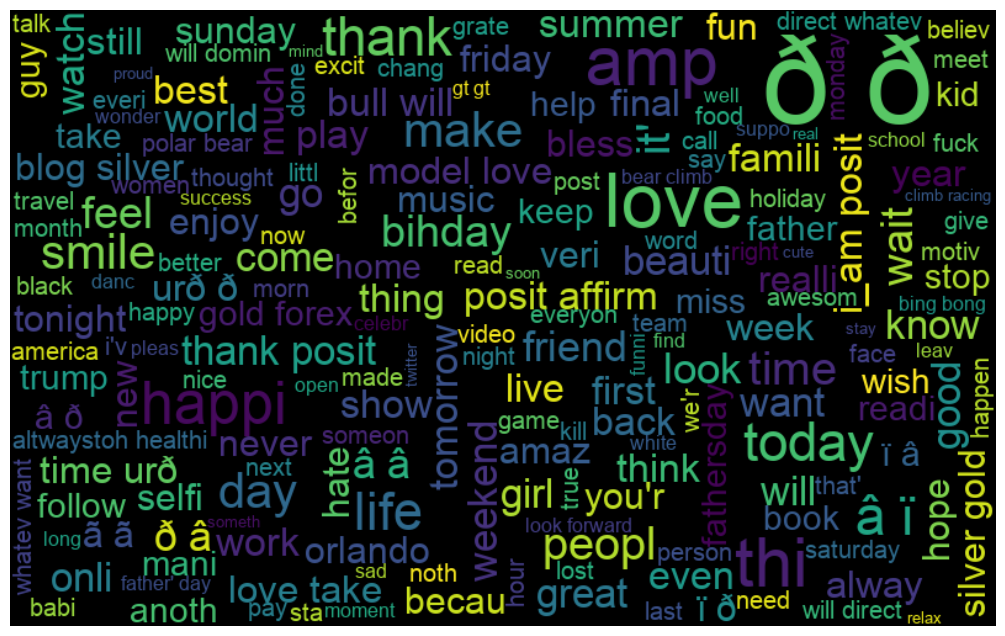

In [56]:
all_words = " ".join([sentence for sentence in df['clean_tweet']])
from wordcloud import WordCloud
wordcloud = WordCloud(font_path='arial.ttf',width=800, height=500, random_state=42, max_font_size=100).generate(all_words)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

**VISULISING FREQUENT +VE TWEETS**

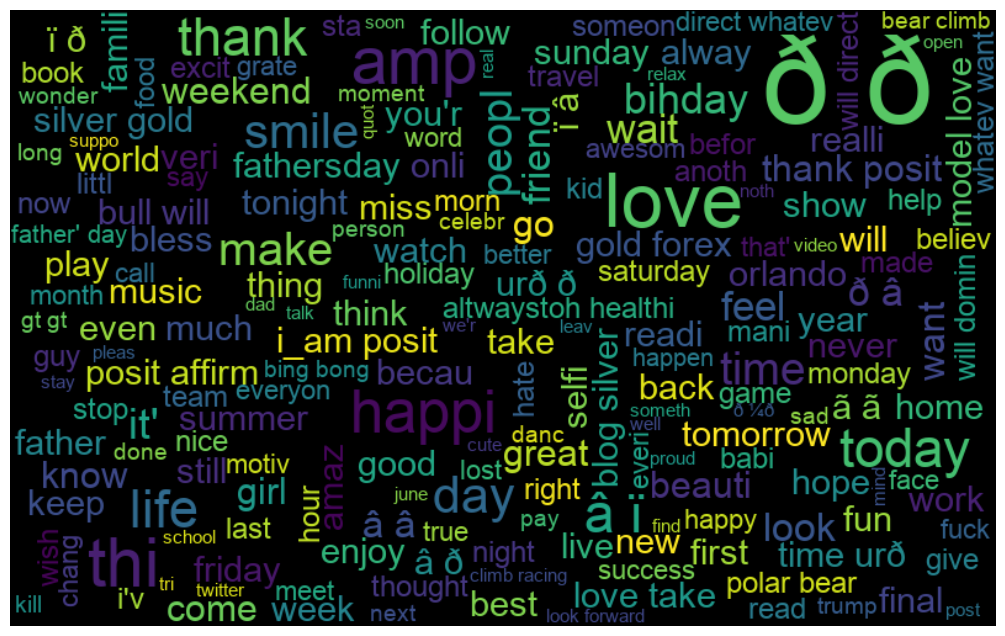

In [57]:
all_words = " ".join([sentence for sentence in df['clean_tweet'][df['label']==0]])

wordcloud = WordCloud(font_path='arial.ttf',width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

**VISULISING FREQUENT -VE TWEETS**

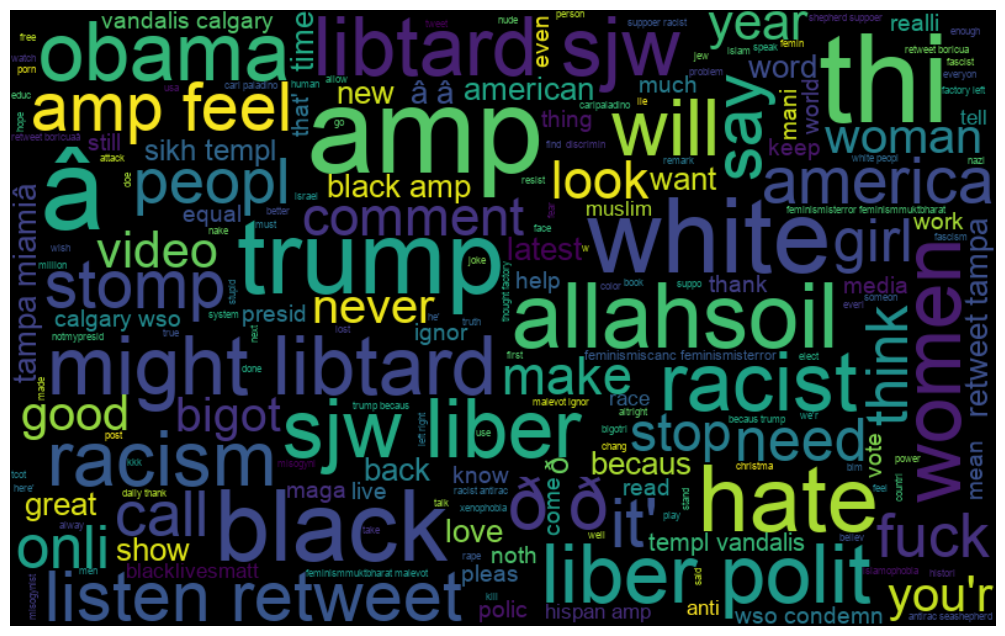

In [58]:
# frequent words visualization for -ve
all_words = " ".join([sentence for sentence in df['clean_tweet'][df['label']==1]])

wordcloud = WordCloud(font_path='arial.ttf',width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

# plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

**EXTRACTING HASTAGS ( +VE & -VE )**

In [59]:
  def hashtag_extract(tweets):
    hashtags = []
    for tweet in tweets:
        ht = re.findall(r"#(\w+)", tweet)
        hashtags.append(ht)
    return hashtags

In [60]:
ht_positive = hashtag_extract(df['clean_tweet'][df['label']==0])

ht_negative = hashtag_extract(df['clean_tweet'][df['label']==1])

In [61]:
ht_positive[:5]

[['run'], ['lyft', 'disapoint', 'getthank'], [], ['model'], ['motiv']]

In [62]:
ht_positive = sum(ht_positive, [])
ht_negative = sum(ht_negative, [])

In [63]:
ht_positive[:5]

['run', 'lyft', 'disapoint', 'getthank', 'model']

In [64]:
freq = nltk.FreqDist(ht_positive)
d = pd.DataFrame({'Hashtag': list(freq.keys()),
                 'Count': list(freq.values())})
d.head()

,Hashtag,Count
0,run,70
1,lyft,2
2,disapoint,1
3,getthank,2
4,model,374


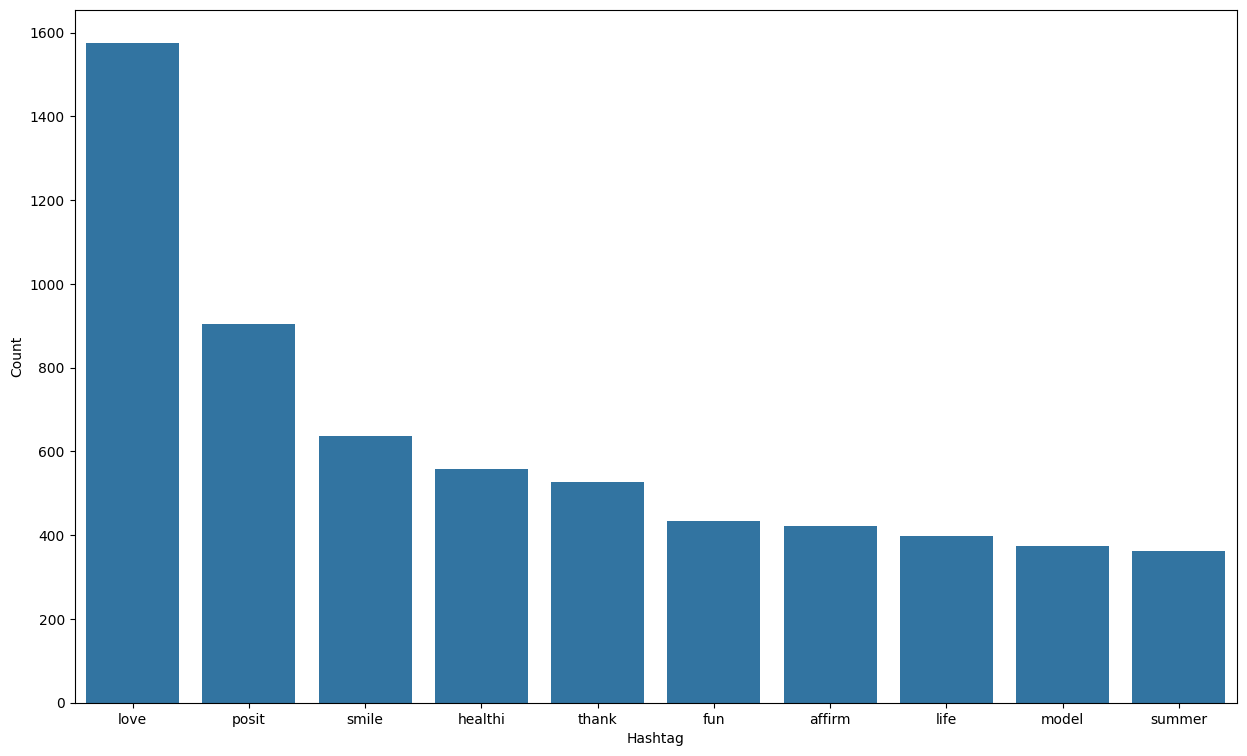

In [65]:
d = d.nlargest(columns='Count', n=10)
plt.figure(figsize=(15,9))
sns.barplot(data=d, x='Hashtag', y='Count')
plt.show()

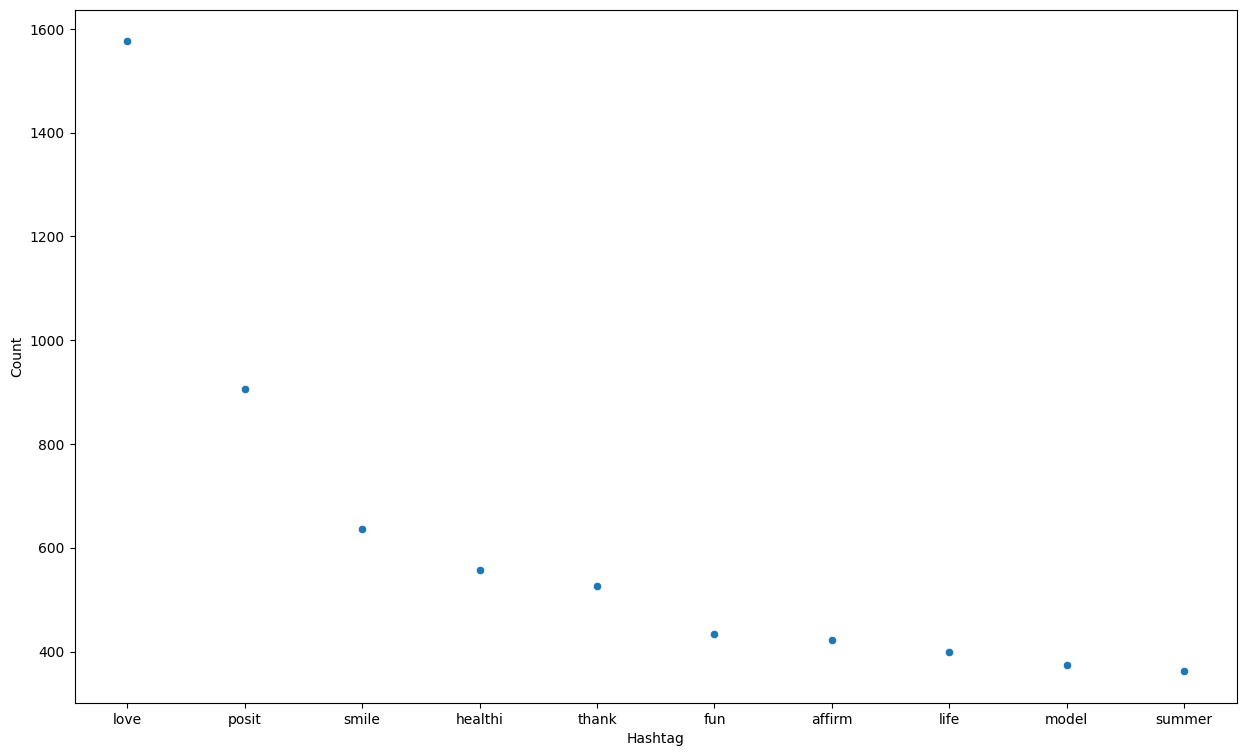

In [66]:
d = d.nlargest(columns='Count', n=10)
plt.figure(figsize=(15,9))
sns.scatterplot(data=d, x='Hashtag', y='Count')
plt.show()

<Figure size 1500x900 with 0 Axes>

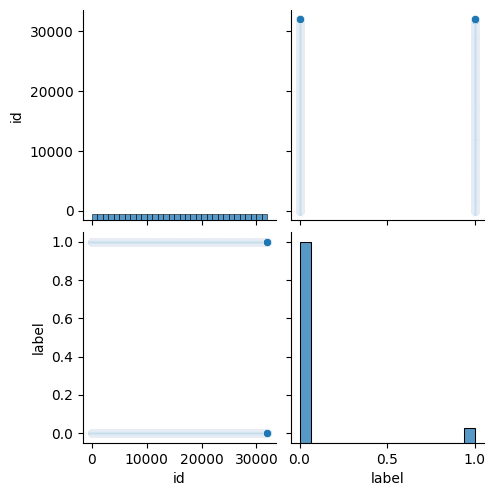

In [67]:
d = d.nlargest(columns='Count', n=10)
plt.figure(figsize=(15,9))
sns.pairplot(df)
plt.show()

In [68]:
freq = nltk.FreqDist(ht_negative)
d = pd.DataFrame({'Hashtag': list(freq.keys()),
                 'Count': list(freq.values())})
d.head()

,Hashtag,Count
0,cnn,9
1,michigan,2
2,tcot,14
3,australia,6
4,opkillingbay,2


In [69]:
d.tail()

,Hashtag,Count
1894,jumpedtheshark,1
1895,freemilo,5
1896,milo,4
1897,mailboxprid,1
1898,liberalism,1


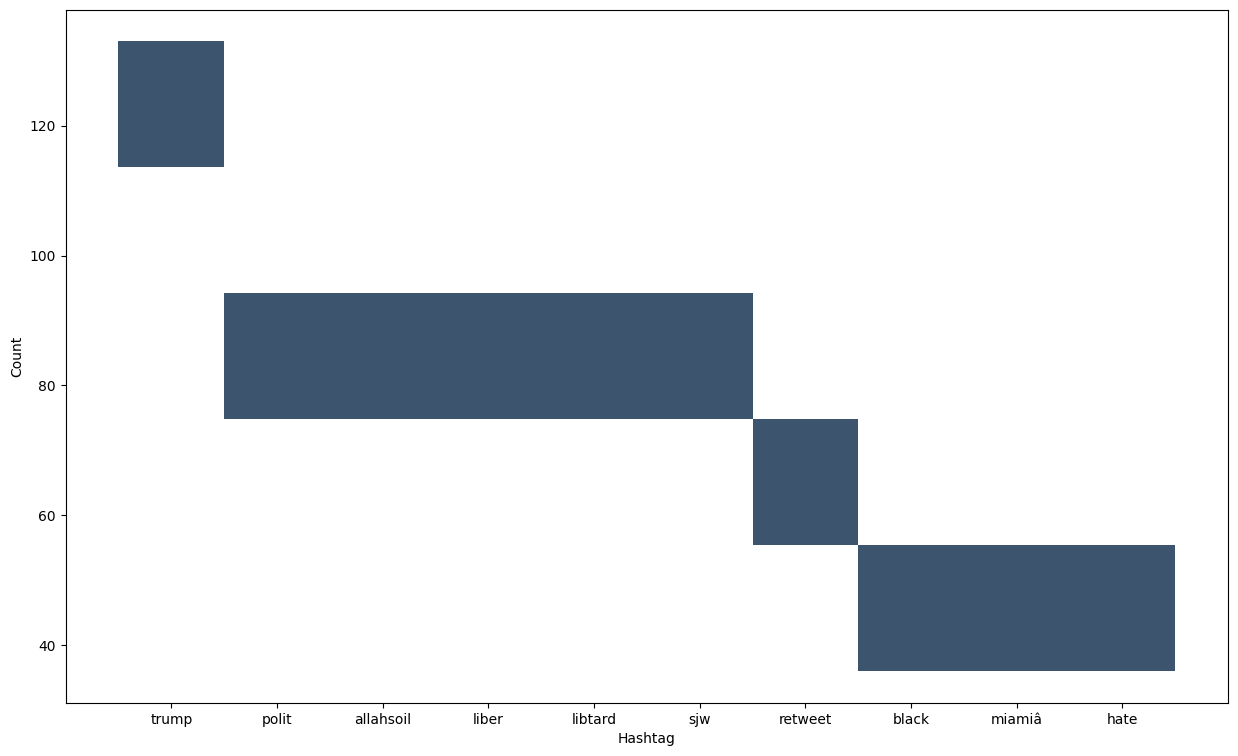

In [70]:
# select top 10 hashtags
d = d.nlargest(columns='Count', n=10)
plt.figure(figsize=(15,9))
sns.histplot(data=d, x='Hashtag', y='Count')
plt.show()

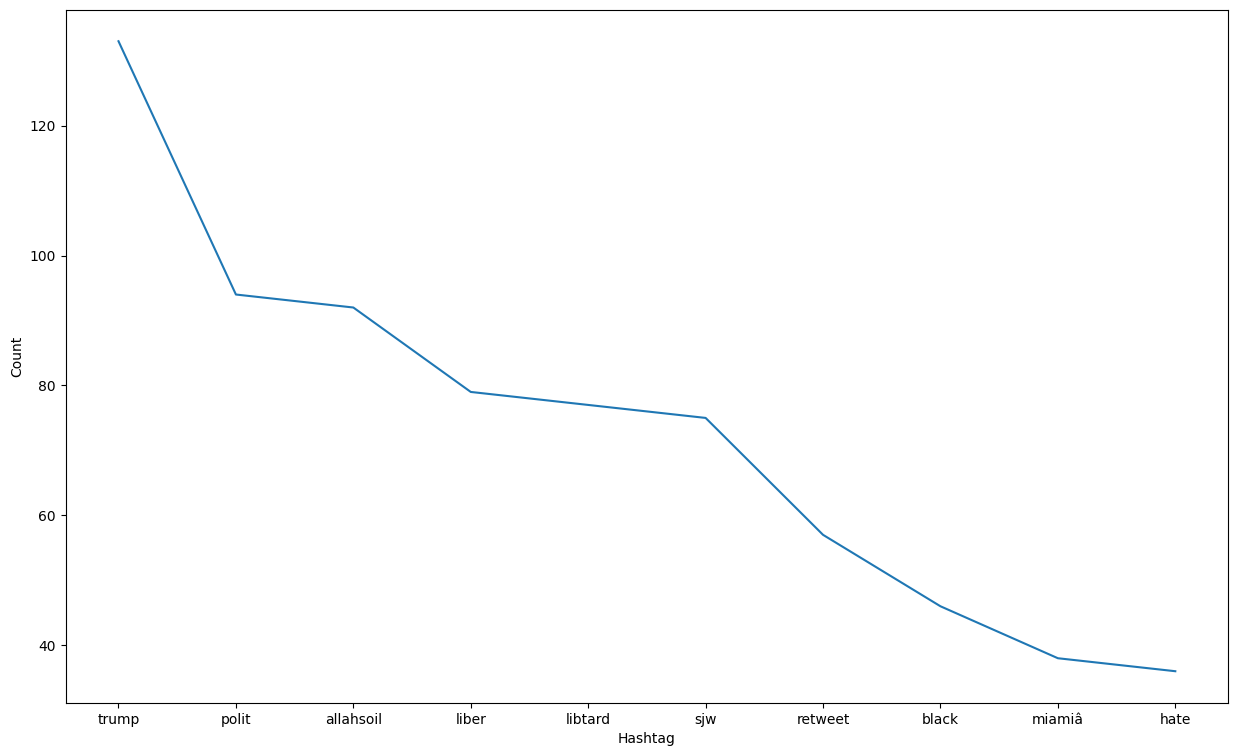

In [71]:
d = d.nlargest(columns='Count', n=10)
plt.figure(figsize=(15,9))
sns.lineplot(data=d, x='Hashtag', y='Count')
plt.show()

**Input Split**

In [72]:
from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
bow = bow_vectorizer.fit_transform(df['clean_tweet'])

In [73]:
bow

<31962x1000 sparse matrix of type '<class 'numpy.int64'>'
	with 123382 stored elements in Compressed Sparse Row format>

In [74]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(bow, df['label'], random_state=42, test_size=0.25)

**MODEL TRAINING**

In [75]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score, precision_score

In [76]:
# training
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [77]:
# testing
pred = model.predict(x_test)
f1_score(y_test, pred)

0.506508875739645

In [78]:
precision_score(y_test, pred)

0.7482517482517482

              precision    recall  f1-score   support

           0       0.96      0.99      0.97      7432
           1       0.75      0.38      0.51       559

    accuracy                           0.95      7991
   macro avg       0.85      0.69      0.74      7991
weighted avg       0.94      0.95      0.94      7991

[[7360   72]
 [ 345  214]]


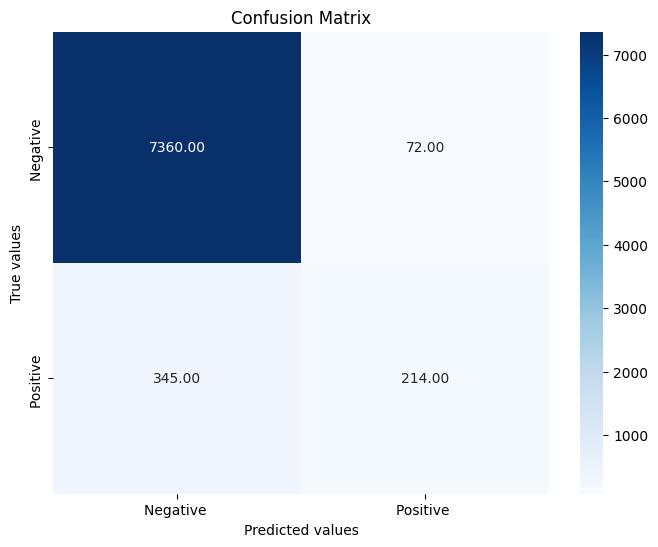

In [79]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
print(classification_report(y_test,pred))
cm=confusion_matrix(y_test,pred)
print(cm)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt=".2f", cmap="Blues",
            xticklabels=["Negative ", "Positive "],
            yticklabels=["Negative ", "Positive "])

plt.xlabel("Predicted values")
plt.ylabel('True values')
plt.title('Confusion Matrix')
plt.show()

In [80]:
from sklearn.svm import SVC
svm=SVC(kernel='linear')
svm.fit(x_train, y_train)
pred=svm.predict(x_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97      7432
           1       0.76      0.39      0.52       559

    accuracy                           0.95      7991
   macro avg       0.86      0.69      0.75      7991
weighted avg       0.94      0.95      0.94      7991



In [81]:
from sklearn.naive_bayes import MultinomialNB
nb=MultinomialNB()
nb.fit(x_train,y_train)
pred=nb.predict(x_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      7432
           1       0.54      0.54      0.54       559

    accuracy                           0.94      7991
   macro avg       0.75      0.75      0.75      7991
weighted avg       0.94      0.94      0.94      7991



In [82]:
import joblib
joblib.dump(bow_vectorizer,open('bow_vectorizer.joblib','wb'))

In [83]:
filename='svm.joblib'
joblib.dump(svm,open(filename,'wb'))